Processing:   0%|          | 0/1 [00:00<?, ?it/s]

训练参数：网络：SeEANet, 簇:6, 间隔时间: 17, 数据融合算法: PCA, 窗口大小：256
semg 数据形状为： torch.Size([26675, 6, 256])
angle 数据形状为： torch.Size([26675, 3])
开始第1次训练！！！
Epoch 100, train_idnex=1, Train Loss: 127.03068, Test Loss: 119.41559
Epoch 200, train_idnex=1, Train Loss: 11.76098, Test Loss: 14.43919
Epoch 300, train_idnex=1, Train Loss: 4.28531, Test Loss: 6.42700
Epoch 400, train_idnex=1, Train Loss: 2.03199, Test Loss: 3.20133
Epoch 500, train_idnex=1, Train Loss: 1.42277, Test Loss: 2.31636
Epoch 600, train_idnex=1, Train Loss: 1.00626, Test Loss: 1.91180
Epoch 700, train_idnex=1, Train Loss: 0.87754, Test Loss: 1.69696
Epoch 800, train_idnex=1, Train Loss: 0.80256, Test Loss: 1.63012
Epoch 900, train_idnex=1, Train Loss: 0.76579, Test Loss: 1.56847
Epoch 1000, train_idnex=1, Train Loss: 0.74624, Test Loss: 1.55520
Epoch 1100, train_idnex=1, Train Loss: 0.73650, Test Loss: 1.53765
Epoch 1200, train_idnex=1, Train Loss: 0.73070, Test Loss: 1.53306
Epoch 1300, train_idnex=1, Train Loss: 0.72753, Test Loss:

Processing: 100%|██████████| 1/1 [1:53:14<00:00, 6794.41s/it]

metrics.json 文件已保存到: /home/admin123/SATData/Run/SeEANet/05-01-15:45:14/MJ_PCA_17_256_6/metrics_10.json
字典已成功保存到 /home/admin123/SATData/Run/05-01-15:45:14/data.json


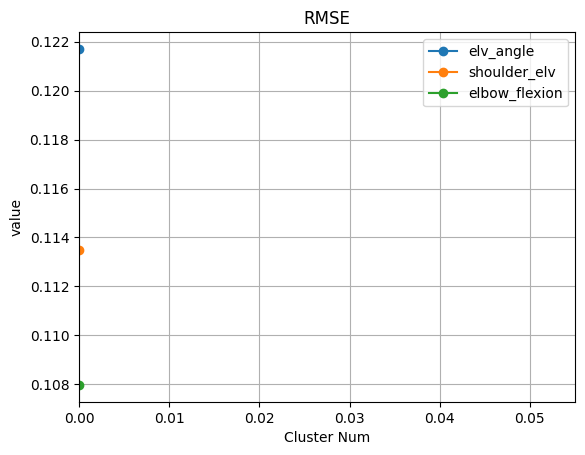

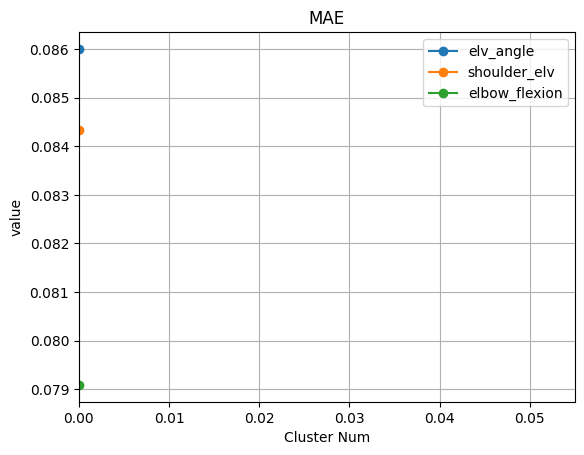

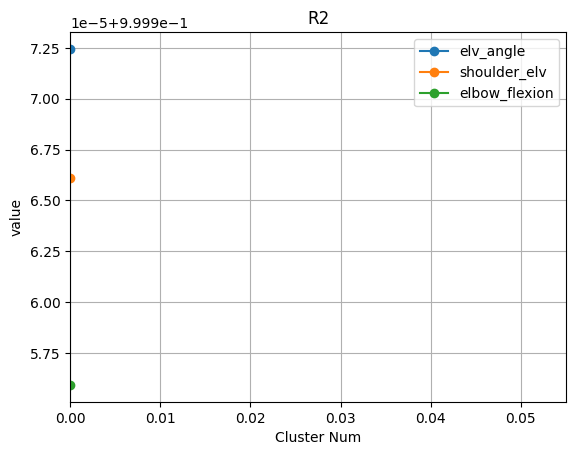

In [2]:
# 验证 delta_T
from utils.train_func import train_func
from datetime import datetime
from tqdm import tqdm
import numpy as np
import json
import os
import matplotlib.pyplot as plt
from utils.tools import make_dir, plot_func


modelList = ['SeEANet', 'SAT', 'MyoNet']
data_dict = {}
# delta_Tlist = [1, 10, 15, 20, 25, 30, 40, 50, 60]
# delta_Tlist = [1, 5, 10, 15, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90 ,100, 120, 140, 160, 180, 200, 230, 260, 300]
# delta_Tlist = [260, 300]

# # people_List = ['S01', 'S02', "S03"]
# people_List = ['S01']

# delta_Tlist = [i for i in range(21, 31)]
# people_List = ['S01', 'S02', "S03", "S04", "S05"]
people_List = ['S01']

delta_T  = 17
# WLlist = [32, 64, 96, 128]
WindowLength = 256

fushion_MethodList = ["WA"]
fushionMethod = "PCA"
saveDir = "/home/admin123/SATData/Run"
dataDir = "/home/admin123/SATData/data"
CNList = [6]
# cluster_name = 6
rmseL = []
maeL = []
r2L = []
formatted_time = datetime.now().strftime("%m-%d-%H:%M:%S")
make_dir(os.path.join(saveDir, formatted_time))
for cluster_name in tqdm(CNList, desc="Processing", position=0):
    rmse, mae, r2 = train_func(modelName='SeEANet', epochs=1500, train_num=10, delta_T=delta_T, windowLength=WindowLength, cluster_num=cluster_name,
                               formatted_time = formatted_time, peopleList=people_List, batch_size=256,
                               data_Dir=dataDir, save_Dir=saveDir, fusionMethod=fushionMethod)
    rmse = np.array(rmse)
    rmse_m = np.mean(rmse,axis=0)
    rmse_s = np.std(rmse, axis=0)
    rmse_d = np.max(rmse, axis=0)-np.min(rmse, axis=0)
    rmseL.append(rmse_m)

    mae = np.array(mae)
    mae_m = np.mean(mae,axis=0)
    mae_s = np.std(mae, axis=0)
    mae_d = np.max(mae, axis=0)-np.min(mae, axis=0)
    maeL.append(mae_m)

    r2 = np.array(r2)
    r2_m = np.mean(r2,axis=0)
    r2_s = np.std(r2, axis=0)
    r2_d = np.max(r2, axis=0)-np.min(r2, axis=0)
    r2L.append(r2_m)

    data_dict[f"rmse_{delta_T}"] = [list(rmse_m), list(rmse_s), list(rmse_d)]
    data_dict[f"mae_{delta_T}"] = [list(mae_m), list(mae_s), list(mae_d)]
    data_dict[f"r2_{delta_T}"] = [list(r2_m), list(r2_s), list(r2_d)]

# 指定 JSON 文件路径
file_path = os.path.join(saveDir, formatted_time, "data.json")

with open(file_path, "w", encoding="utf-8") as file:
    json.dump(data_dict, file, ensure_ascii=False, indent=4)

print(f"字典已成功保存到 {file_path}")


rmseL = np.array(rmseL)
maeL = np.array(maeL)
r2L = np.array(r2L)

List = [i for i in range(len(fushion_MethodList))]
Xlabel = "Cluster Num"

saveFolderName = "CN——指标对比"
save_Dir = os.path.join('/home/admin123/SATData/Run', "figures", saveFolderName)
plot_func(save_Dir, rmseL, List, Xlabel, "value", 0, None, "RMSE.png")
plot_func(save_Dir, maeL, List, Xlabel, "value", 0, None, "MAE.png")
plot_func(save_Dir, r2L, List, Xlabel, "value", 0, None, "R2.png")



In [1]:
# 验证 delta_T
from utils.train_func import train_func
from datetime import datetime
from tqdm import tqdm
import numpy as np
import json
import os
import matplotlib.pyplot as plt
from utils.tools import make_dir, plot_func


modelList = ['SeEANet', 'SAT', 'MyoNet']
data_dict = {}
# delta_Tlist = [1, 10, 15, 20, 25, 30, 40, 50, 60]
# delta_Tlist = [1, 5, 10, 15, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90 ,100, 120, 140, 160, 180, 200, 230, 260, 300]
# delta_Tlist = [260, 300]

# # people_List = ['S01', 'S02', "S03"]
# people_List = ['S01']

# delta_Tlist = [i for i in range(21, 31)]
people_List = ['S01', 'S02', "S03", "S04", "S05"]
# people_List = ['S01']

delta_T  = 17
# WLlist = [32, 64, 96, 128]
WindowLength = 256

saveDir = "/home/admin123/SATData/Run"
dataDir = "/home/admin123/SATData/data"
CNList = [8, 10]
rmseL = []
maeL = []
r2L = []
formatted_time = datetime.now().strftime("%m-%d-%H:%M:%S")
make_dir(os.path.join(saveDir, formatted_time))
for cluster_name in tqdm(CNList, desc="Processing", position=0):
    rmse, mae, r2 = train_func(modelName='SeEANet', epochs=1500, train_num=10, delta_T=delta_T, windowLength=WindowLength, cluster_num=cluster_name,
                               formatted_time = formatted_time, peopleList=people_List, batch_size=256,
                               data_Dir=dataDir, save_Dir=saveDir)
    rmse = np.array(rmse)
    rmse_m = np.mean(rmse,axis=0)
    rmse_s = np.std(rmse, axis=0)
    rmse_d = np.max(rmse, axis=0)-np.min(rmse, axis=0)
    rmseL.append(rmse_m)

    mae = np.array(mae)
    mae_m = np.mean(mae,axis=0)
    mae_s = np.std(mae, axis=0)
    mae_d = np.max(mae, axis=0)-np.min(mae, axis=0)
    maeL.append(mae_m)

    r2 = np.array(r2)
    r2_m = np.mean(r2,axis=0)
    r2_s = np.std(r2, axis=0)
    r2_d = np.max(r2, axis=0)-np.min(r2, axis=0)
    r2L.append(r2_m)

    data_dict[f"rmse_{delta_T}"] = [list(rmse_m), list(rmse_s), list(rmse_d)]
    data_dict[f"mae_{delta_T}"] = [list(mae_m), list(mae_s), list(mae_d)]
    data_dict[f"r2_{delta_T}"] = [list(r2_m), list(r2_s), list(r2_d)]

# 指定 JSON 文件路径
file_path = os.path.join(saveDir, formatted_time, "data.json")

with open(file_path, "w", encoding="utf-8") as file:
    json.dump(data_dict, file, ensure_ascii=False, indent=4)

print(f"字典已成功保存到 {file_path}")


rmseL = np.array(rmseL)
maeL = np.array(maeL)
r2L = np.array(r2L)

List = CNList
Xlabel = "Cluster Num"

saveFolderName = "CN——指标对比"
save_Dir = os.path.join('/home/admin123/SATData/Run', "figures", saveFolderName)
make_dir(save_Dir)
plot_func(save_Dir, rmseL, List, Xlabel, "value", 0, None, "RMSE.png")
plot_func(save_Dir, maeL, List, Xlabel, "value", 0, None, "MAE.png")
plot_func(save_Dir, r2L, List, Xlabel, "value", 0, None, "R2.png")



Processing:   0%|          | 0/2 [00:00<?, ?it/s]

训练参数：网络：SeEANet, 簇:8, 间隔时间: 17, 数据融合算法: PCA, 窗口大小：256
semg 数据形状为： torch.Size([133372, 8, 256])
angle 数据形状为： torch.Size([133372, 3])
开始第1次训练！！！


Processing:   0%|          | 0/2 [00:16<?, ?it/s]


KeyboardInterrupt: 